In [130]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time
import math

% matplotlib inline

In [5]:
#parameters
dt = 0.6  #seconds
v_m = 0.12  #mm/s
v_s = 0.01  #std of speed
th_m = 0  #mean curving is zero
th_s = 32.3  #degrees/mm
th_cor = 12  #12 seconds helf-time

In [93]:
#Autocorrelation function
def autocorr(x):
    result = np.correlate(x, x, 'full')
    result = result[int(result.size/2):]
    return result/result[0]

In [144]:
angle/np.pi*180

45.052567758700626

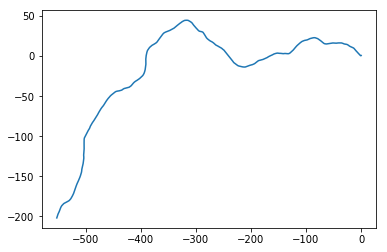

In [202]:
# initialize space-time
T = 10000
time = np.arange(0,T*dt,dt)
xs = np.zeros(time.shape)
ys = np.zeros(time.shape)  #2D location
xs[0] = np.random.rand()
ys[0] = np.random.rand()
ths = np.zeros(time.shape)  #agle with 1,0
ths[0] = np.random.rand()*360

#without turning (OU-like tragectories)
for t in range(1,len(time)):
    vv = v_m + v_s*np.random.randn()
    ths[t] = ths[t-1] + (th_m + th_s*(vv*dt)*np.random.randn()) *dt  #OU process? (- ths[t-1]/th_cor + )
    
    e1 = np.array([1,0])
    vec = np.array([xs[t-1],ys[t-1]])
    theta = math.acos(np.clip(np.dot(vec,e1)/np.linalg.norm(vec)/np.linalg.norm(e1), -1, 1)) #current orienation relative to (1,0)
    
    dd = np.array([vv*np.sin(ths[t-1]*np.pi/180), vv*np.cos(ths[t-1]*np.pi/180)])  #displacement
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,s), (-s, c)))  #rotation matrix
    dxy = np.dot(R,dd)
                             
    xs[t] = xs[t-1] + dxy[0] *dt
    ys[t] = ys[t-1] + dxy[1] *dt
    
plt.plot(xs,ys)

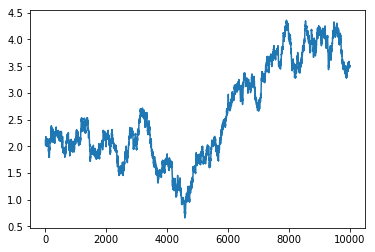

In [200]:
plt.plot(ths*np.pi/180)

Text(0,0.5,'autocorr')

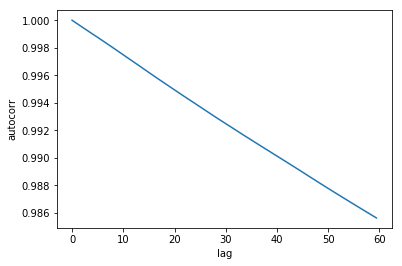

In [201]:
#plt.plot(np.arange(0,len(autocorr(ths))*dt,dt),autocorr(ths))
lag = np.arange(0,len(autocorr(ths))*dt,dt)
plt.plot(lag[0:100],autocorr(ths)[0:100])
plt.xlabel('lag')
plt.ylabel('autocorr')

In [ ]:
#with turning (switching-state)